# **TP N°1 : cinquième partie.**
# **Régression avec l'algorithme des $k$-ppv.**

Avec un jeu de données artificiel et de petite taille.

In [1]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA

import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors

In [2]:
# On crée un nuage de points autour d'une courbe sinusoïdale.
rng = np.random.RandomState(0)
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X_train).ravel()
# A laquelle on ajoute un peu de bruit.
y[::5] += 1 * (0.5 - np.random.rand(8))

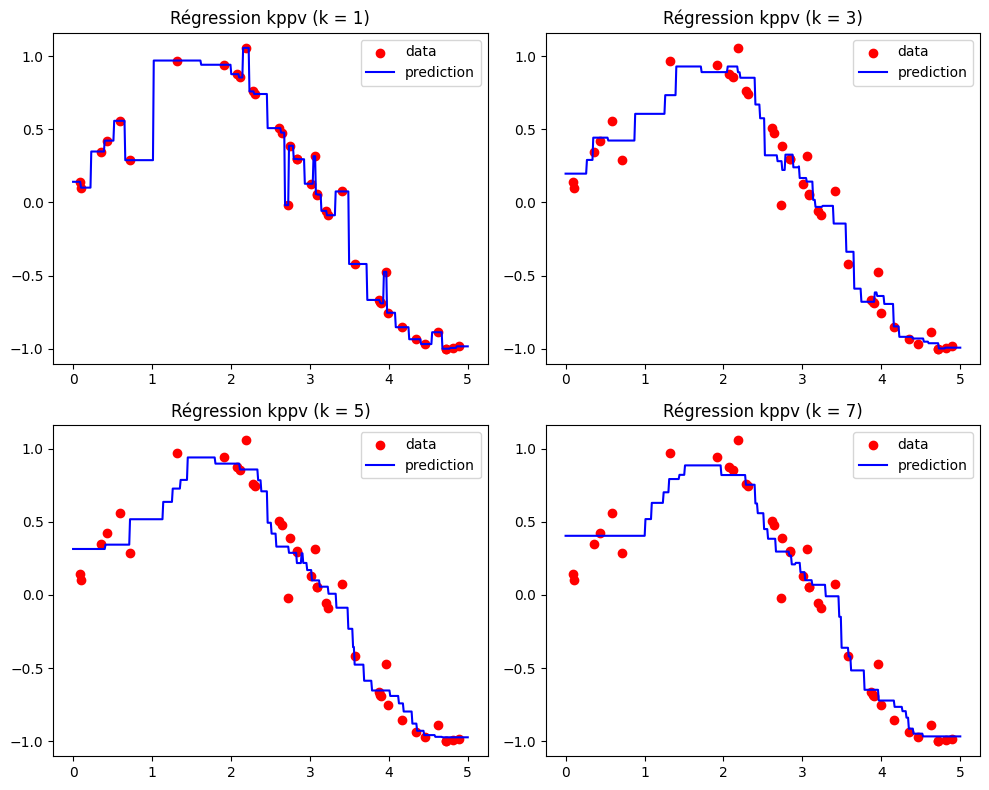

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()
#for i, k in enumerate(np.arange(1, 10, 2)):
for i, k in enumerate(np.arange(1, 8, 2)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    ypred = knn.fit(X_train, y).predict(X_test)
    axes[i].scatter(X_train, y, color="red", label="data")
    axes[i].plot(X_test, ypred, color="blue", label="prediction")
    axes[i].axis("tight")
    axes[i].legend()
    axes[i].set_title(f"Régression kppv (k = {k})")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3253178414.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


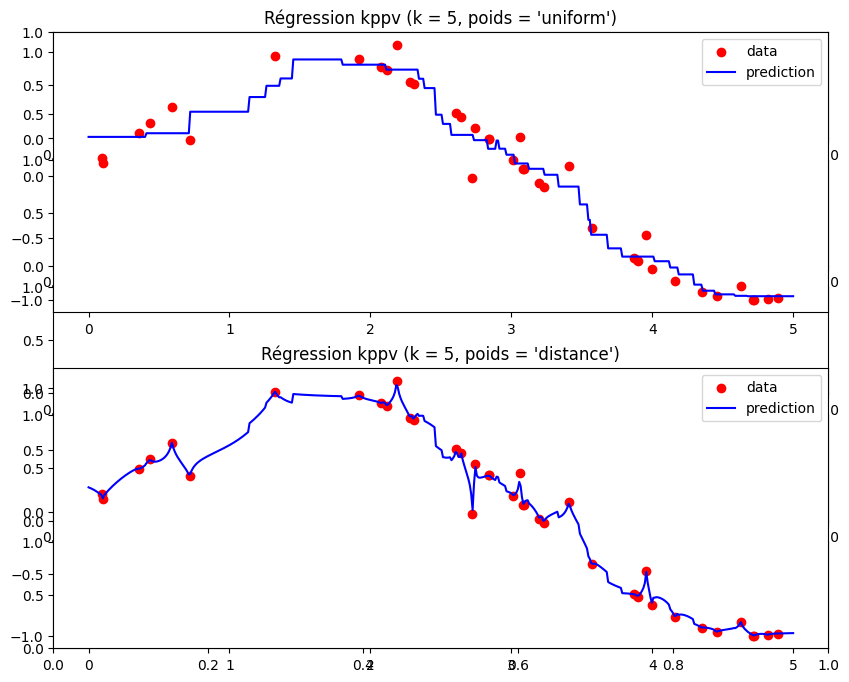

In [7]:
n_neighbors = 5
fig, axes = plt.subplots(5, 1, figsize=(10, 8))
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y).predict(X_test)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train, y, color="red", label="data")
    plt.plot(X_test, y_, color="blue", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("Régression kppv (k = %i, poids = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

# **Régression avec des arbres de décision CART.**

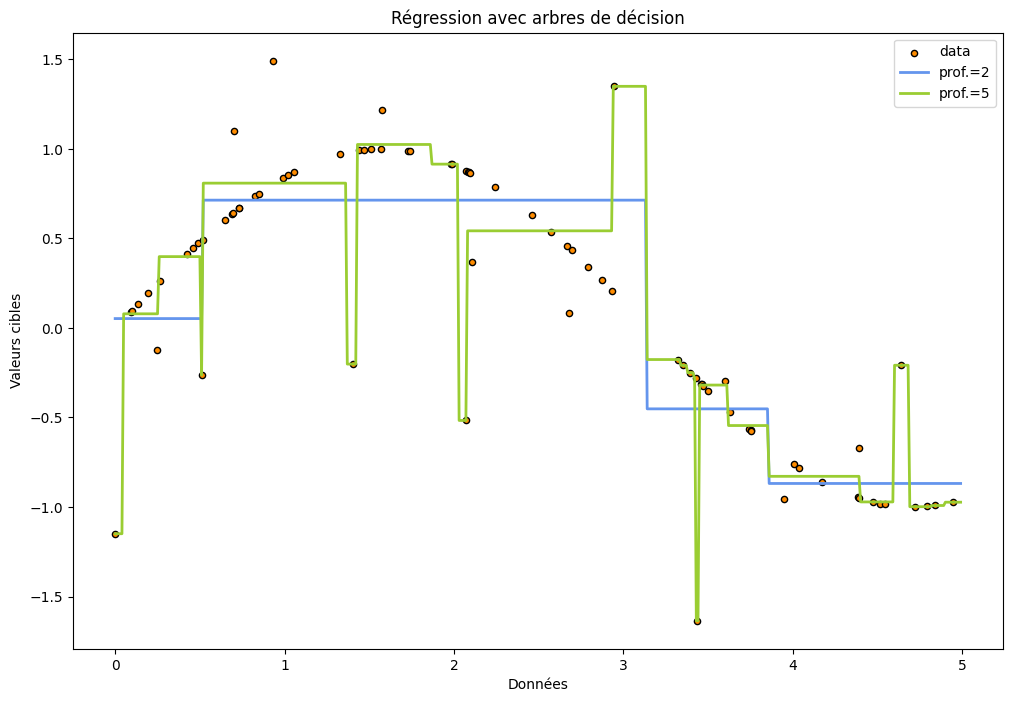

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Construction d'un nuage de points à partir d'un sinus bruité.
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
from sklearn.tree import DecisionTreeRegressor
# Construction de deux arbres de décision de profondeur différentes.
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
# Affichage des régresseurs.
plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="prof.=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="prof.=5", linewidth=2)
plt.xlabel("Données")
plt.ylabel("Valeurs cibles")
plt.title("Régression avec arbres de décision")
plt.legend()
plt.show()

Affichage des deux arbres.

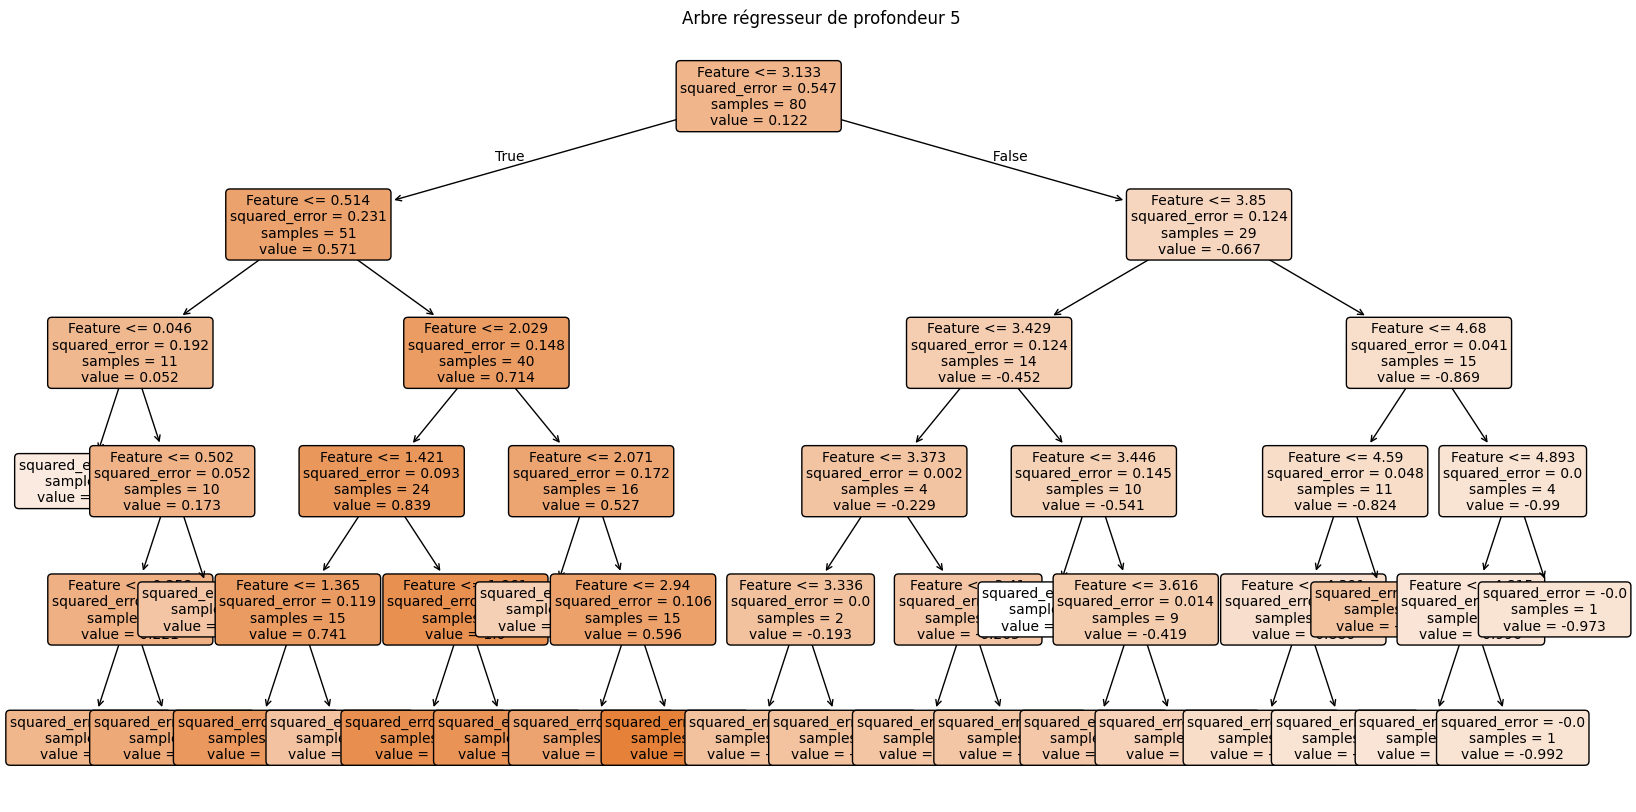

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    regr_2,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre régresseur de profondeur 5")
plt.show()

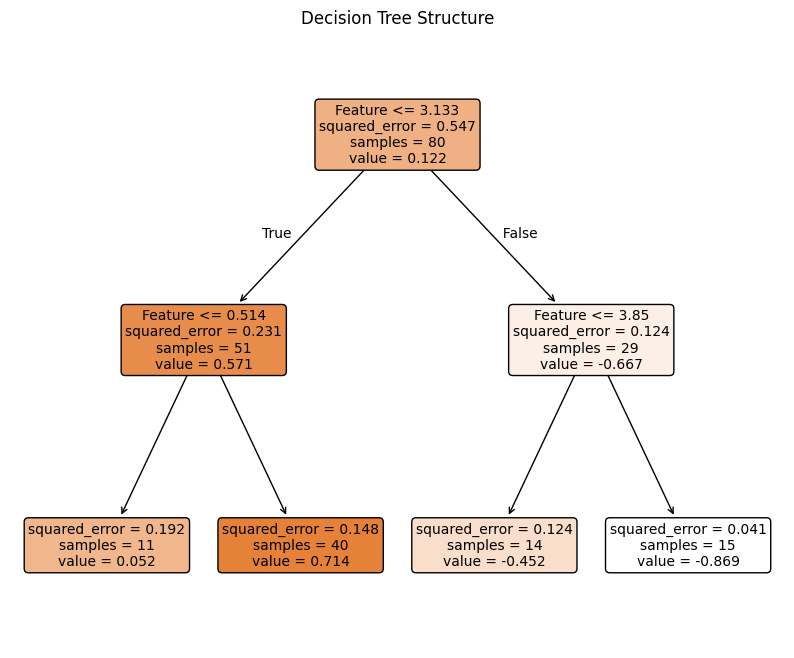

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(
    regr_1,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre régresseur de profondeur 2")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.0 MB/s eta 0:00:00


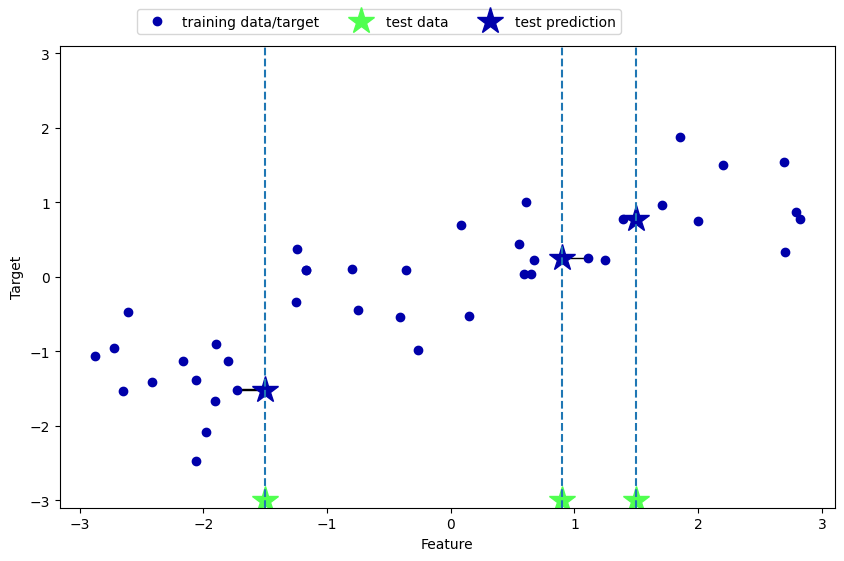

In [ ]:
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_regression(n_neighbors=1)

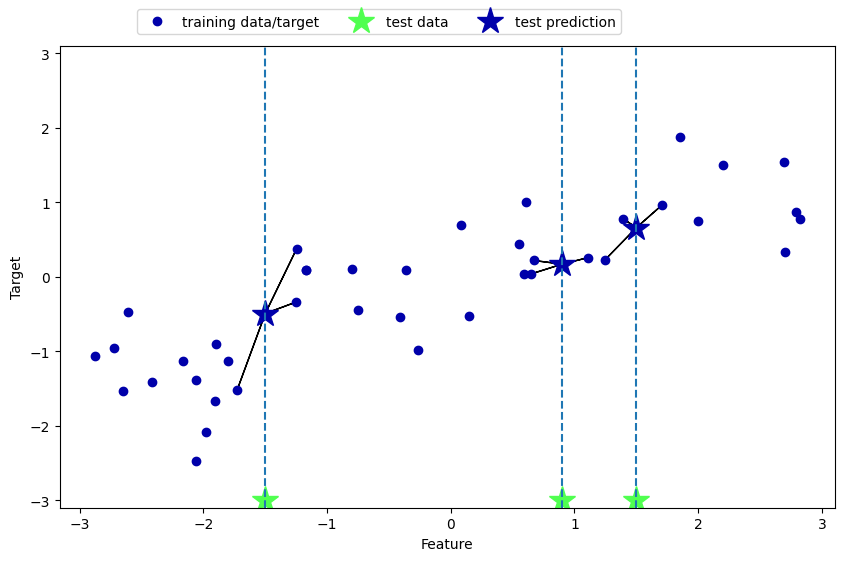

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))


0.8344172446249605


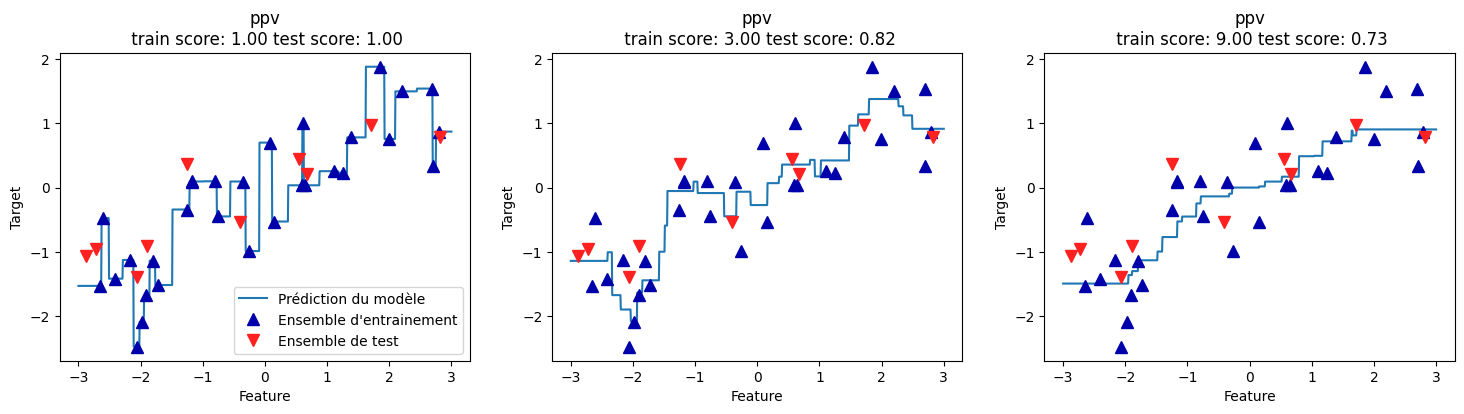

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
# On crée 1,000 points régulièrement espacés entre -3 et 3.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # prédictions pour k = 1, 3, 9 avec k-ppv.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("ppv\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Prédiction du modèle", "Ensemble d'entrainement","Ensemble de test"], loc="best")

Avec le jeu de données << sacramento >>. Il s'agit de 932 transactions immobilières à Sacramento, Californie, initialement parues dans le journal Sacramento Bee. Le problème posé est de savoir si l'on peut utiliser la taille d’une maison dans la région de Sacramento pour prédire son prix de vente.

In [ ]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output="pandas")
np.random.seed(10)
sacramento = pd.read_csv("https://cpmath.fr/sacramento.csv")
sacramento

street             city    zip state  beds  baths  sqft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1   836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1  1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1   796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1   852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1   797   
..                   ...              ...    ...   ...   ...    ...   ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3  2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2  1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2  1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2  1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2  1362   

            type                      saledate   price   latitude   longitude  
0    Residential  Wed May 21 00:00:00 EDT 2008   59222  38.631913 -121.434879  
1    Residential  Wed May 21 00:00:00 EDT 2008   68212  38.478902 -121.431028  
2    Residential  Wed May 21 00:00:00 EDT 2008   68880  38.618305 -121.443839  
3    Residential  Wed May 21 00:00:00 EDT 2008   69307  38.616835 -121.439146  
4    Residential  Wed May 21 00:00:00 EDT 2008   81900  38.519470 -121.435768  
..           ...                           ...     ...        ...         ...  
980  Residential  Thu May 15 00:00:00 EDT 2008  232425  38.457679 -121.359620  
981  Residential  Thu May 15 00:00:00 EDT 2008  234000  38.499893 -121.458890  
982  Residential  Thu May 15 00:00:00 EDT 2008  235000  38.708824 -121.256803  
983  Residential  Thu May 15 00:00:00 EDT 2008  235301  38.417000 -121.397424  
984  Residential  Thu May 15 00:00:00 EDT 2008  235738  38.655245 -121.075915  

[985 rows x 12 columns]

In [ ]:
scatter = alt.Chart(sacramento).mark_circle().encode(
    x=alt.X("sqft", scale=alt.Scale(zero=False), title="Taille des logements (en pieds carrés)"),
    y=alt.Y("price", axis=alt.Axis(format="$,.0f"), title="Prix (USD)")
)
scatter

alt.Chart(...)

In [ ]:
small_sacramento = sacramento.sample(n=30)

In [ ]:
small_plot = alt.Chart(small_sacramento).mark_circle(opacity=1).encode(
  x=alt.X("sqft", scale=alt.Scale(zero=False), title="Taille des logements (en pieds carrés)"),
  y=alt.Y("price", axis=alt.Axis(format="$,.0f"), title="Prix (USD)")
)
line_df = pd.DataFrame({"x": [2000]})
rule = alt.Chart(line_df).mark_rule(strokeDash=[6], size=1.5, color="black").encode(x="x")
small_plot + rule

alt.LayerChart(...)

In [ ]:
small_sacramento["dist"] = (2000 - small_sacramento["sqft"]).abs()
nearest_neighbors = small_sacramento.nsmallest(5, "dist")
nearest_neighbors

street            city    zip state  beds  baths  sqft  \
529       169 BAURER CIR          FOLSOM  95630    CA     4      3  1939   
513    2103 BURBERRY WAY      SACRAMENTO  95835    CA     3      2  1800   
211    2460 EL ROCCO WAY  RANCHO CORDOVA  95670    CA     3      2  1671   
499  4712 PISMO BEACH DR        ANTELOPE  95843    CA     5      3  2346   
969        4900 ELUDE CT      SACRAMENTO  95842    CA     4      2  1627   

            type                      saledate   price   latitude   longitude  \
529  Residential  Mon May 19 00:00:00 EDT 2008  423000  38.666950 -121.120729   
513  Residential  Mon May 19 00:00:00 EDT 2008  362305  38.673420 -121.508542   
211  Residential  Tue May 20 00:00:00 EDT 2008  175000  38.591477 -121.315340   
499  Residential  Mon May 19 00:00:00 EDT 2008  320000  38.707705 -121.354153   
969  Residential  Thu May 15 00:00:00 EDT 2008  223000  38.696740 -121.350519   

     dist  
529    61  
513   200  
211   329  
499   346  
969   373

In [ ]:
prediction = nearest_neighbors["price"].mean()
prediction

np.float64(300661.0)